In [5]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

# Parent dir
parent_dir = "/content/drive/MyDrive"
os.makedirs(parent_dir, exist_ok=True)
os.chdir(parent_dir)
print("当前工作目录：", os.getcwd())

当前工作目录： /content/drive/MyDrive


In [2]:
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [32]:
import geopandas as gpd

# 读取 .shp 文件
accessibility_gdf = gpd.read_file('Capstone/IMPORTANT_DATA/park_accessibility_analysis.shp')
accessibility_gdf

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,R_j,C_j,geometry
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,4.965937e-08,198.444303,"POLYGON ((121.47083 31.23446, 121.47125 31.233..."
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,1.482014e-07,46.696943,"POLYGON ((121.46457 31.22042, 121.46464 31.220..."
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,2.005230e-10,4662.802711,"POLYGON ((121.46866 31.23965, 121.46744 31.239..."
3,246,58413664,7202,park,None,0.004009,4.514200e-07,8.537400e-11,5287.586959,"POLYGON ((121.47952 31.19812, 121.47822 31.198..."
4,247,58413720,7202,park,None,0.005192,9.922400e-07,2.469320e-10,4018.269810,"POLYGON ((121.48059 31.19819, 121.48047 31.198..."
...,...,...,...,...,...,...,...,...,...,...
105,5513,477138725,7202,park,None,0.001543,1.101900e-07,3.224450e-10,341.733049,"POLYGON ((121.44744 31.21099, 121.44719 31.210..."
106,5514,477138726,7202,park,None,0.001404,1.157900e-07,3.964180e-10,292.091011,"POLYGON ((121.44357 31.21067, 121.44327 31.210..."
107,6469,571607270,7202,park,None,0.002431,2.940200e-07,2.200157e-09,133.635944,"POLYGON ((121.44621 31.19872, 121.4466 31.1979..."
108,9370,870546902,7202,park,None,0.008064,1.239510e-06,7.526439e-09,164.687448,"POLYGON ((121.45771 31.17676, 121.45772 31.176..."


In [35]:
elderly_density_path = 'Capstone/IMPORTANT_DATA/pop_density.csv'
accessibility_path='Capstone/IMPORTANT_DATA/accessibility_data.csv'
visiting_numbers_path = 'Capstone/IMPORTANT_DATA/parks_visit_count (1).csv'
poi_diversity_path = 'Capstone/IMPORTANT_DATA/poi_diversity (1).csv'

# 加载每个 CSV 文件
elderly_density_df = pd.read_csv(elderly_density_path)
accessibility_df = pd.read_csv(accessibility_path)
visiting_numbers_df = pd.read_csv(visiting_numbers_path)
poi_density_df = pd.read_csv(poi_diversity_path)

# Merge
merged_df = elderly_density_df.merge(accessibility_df, on='OBJECTID', how='inner')
merged_df = merged_df.merge(visiting_numbers_df, on='OBJECTID', how='inner')
merged_df = merged_df.merge(poi_density_df, on='OBJECTID', how='inner')

merged_df

,OBJECTID,population_density,R_j,C_j,visit_count,poi_entropy_500m
0,56,4323.209232,4.965937e-08,198.444303,38,2.144317
1,57,6486.324482,1.482014e-07,46.696943,33,2.206376
2,129,4341.720982,2.005230e-10,4662.802711,26,2.283983
3,246,7487.630415,8.537400e-11,5287.586959,27,2.254954
4,247,7184.962137,2.469320e-10,4018.269810,25,2.252107
...,...,...,...,...,...,...
105,5513,3637.379818,3.224450e-10,341.733049,25,2.225537
106,5514,4306.456010,3.964180e-10,292.091011,23,2.192877
107,6469,5528.125035,2.200157e-09,133.635944,23,2.379101
108,9370,10338.352359,7.526439e-09,164.687448,31,2.328584


## load data

In [36]:
# 加载数据
data_path = 'Capstone/IMPORTANT_DATA/filtered_park_df.geojson'
gdf = gpd.read_file(data_path)
#print(gdf)
gdf = gdf.merge(merged_df[['OBJECTID', 'population_density', 'R_j','C_j','visit_count', 'poi_entropy_500m']], on='OBJECTID', how='left')
features=gdf[['population_density','C_j','visit_count', 'poi_entropy_500m']]

In [39]:
from sklearn.preprocessing import StandardScaler
# 标准化处理
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# 转换为 DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=['population_density','C_j','visit_count', 'poi_entropy_500m'])
# 检查标准化结果
scaled_features_df
print(scaled_features)

[[-9.07384515e-01 -7.76930793e-01  1.76338800e+00 -4.60215926e-01]
 [-2.00667922e-01 -8.22720469e-01  9.12630634e-01  5.70136567e-03]
 [-9.01336496e-01  5.70186727e-01 -2.78429685e-01  5.88353674e-01]
 [ 1.26471152e-01  7.58715006e-01 -1.08278211e-01  3.70415641e-01]
 [ 2.75856697e-02  3.75699304e-01 -4.48581159e-01  3.49038259e-01]
 [ 9.45345164e-01  3.11258464e-01 -1.08278211e-01  3.40648719e-01]
 [-1.37521741e-01  1.17942808e+00  6.18732633e-02 -4.69506902e-02]
 [-7.97077301e-01  3.22036005e+00  7.42479160e-01  5.55938381e-01]
 [-1.37972075e+00  3.05109285e+00 -4.48581159e-01 -3.00919824e-01]
 [-1.37652851e+00 -7.86686083e-01  6.18732633e-02  4.81423846e-01]
 [-7.72455613e-02 -5.03525735e-01 -7.88884107e-01  4.45349211e-01]
 [-3.35718342e-01 -8.35081288e-01 -7.88884107e-01  4.52967005e-01]
 [ 1.59472326e-01 -8.04526626e-01 -6.18732633e-01 -1.97629386e+00]
 [ 1.28166053e+00 -5.74247973e-01  6.18732633e-02 -2.21403687e+00]
 [-1.23700028e-01  1.53140161e-01  5.72327686e-01 -1.04295722e

In [25]:
import numpy as np

# 检查是否有缺失值（NaN）
print(np.isnan(scaled_features).sum())

0


In [40]:
from sklearn.impute import SimpleImputer

# 使用均值填充 NaN 值
imputer = SimpleImputer(strategy='mean')
scaled_features_filled = imputer.fit_transform(scaled_features)

# Clustering --- 4 cluster

## model

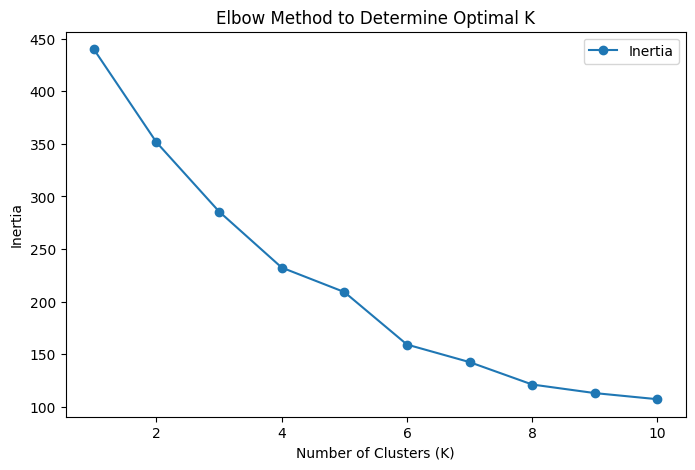

In [27]:
# 使用肘部法评估最佳 K 值
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_filled)
    inertia.append(kmeans.inertia_)
    #print(kmeans.inertia_)

# 绘制肘部法图
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'o-', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.legend()
plt.show()


In [100]:
# 执行 K-Means 聚类
k = 4  # 根据肘部法结果选择 K 值
kmeans = KMeans(n_clusters=k, random_state=42)
gdf['cluster'] = kmeans.fit_predict(scaled_features_filled)

# 查看聚类结果
print(gdf[['population_density','C_j','visit_count', 'poi_entropy_500m']].head())


   population_density          C_j  visit_count  poi_entropy_500m
0         4323.209232   198.444303           38          2.144317
1         6486.324482    46.696943           33          2.206376
2         4341.720982  4662.802711           26          2.283983
3         7487.630415  5287.586959           27          2.254954
4         7184.962137  4018.269810           25          2.252107


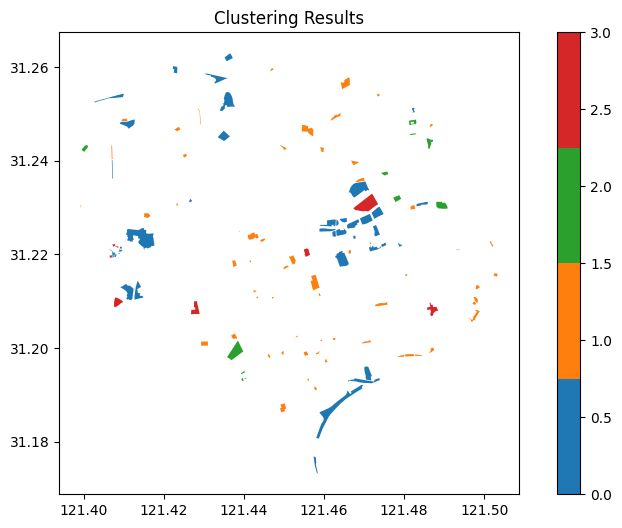

In [104]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cmap = ListedColormap(colors)

gdf.plot(column='cluster', cmap=cmap, legend=True, figsize=(10, 6))
# 绘制聚类结果的地图
plt.title('Clustering Results')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seabo

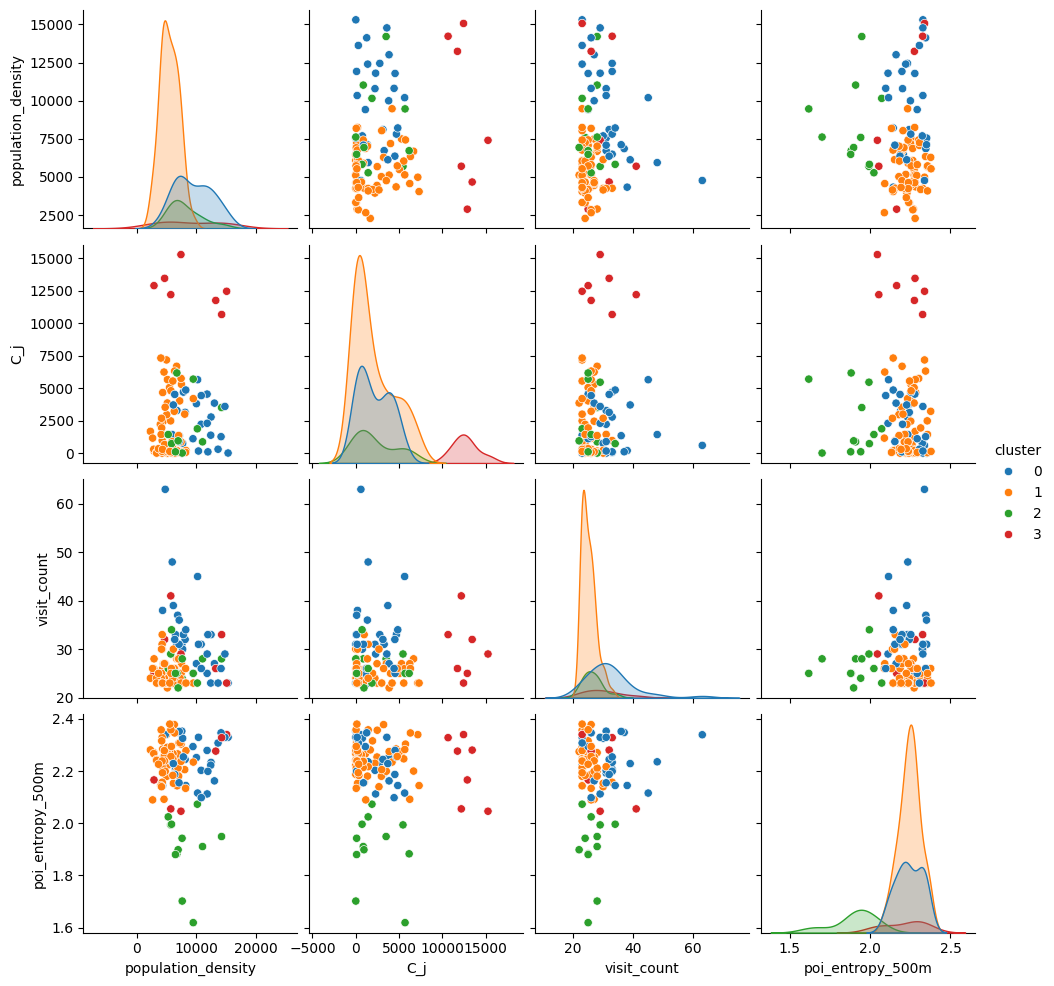

In [49]:
# 绘制每个聚类类别的特征分布
color_list = cmap.colors
sns.pairplot(data=gdf, vars=['population_density',"C_j", 'visit_count', 'poi_entropy_500m'], hue='cluster', palette=color_list)
plt.show()


In [106]:
#save
gdf.to_file("/content/drive/MyDrive/Capstone/IMPORTANT_DATA/cluster_result1206.geojson", driver="GeoJSON")


### performance

In [101]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np
labels = np.array(gdf['cluster'])
print("gdf_X shape:", len(scaled_features))
print("labels shape:", len(labels))
# 计算Calinski-Harabasz指数
ch_score = calinski_harabasz_score(scaled_features, labels)
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

gdf_X shape: 110
labels shape: 110
Calinski-Harabasz Score: 31.59


In [102]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# 计算聚类结果的轮廓系数
score = silhouette_score(scaled_features, labels)
print(f"Silhouette Score: {score}")
dbi = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Score: {dbi}")

Silhouette Score: 0.30257958898317244
Davies-Bouldin Score: 1.294766582422855


### clusters analysis

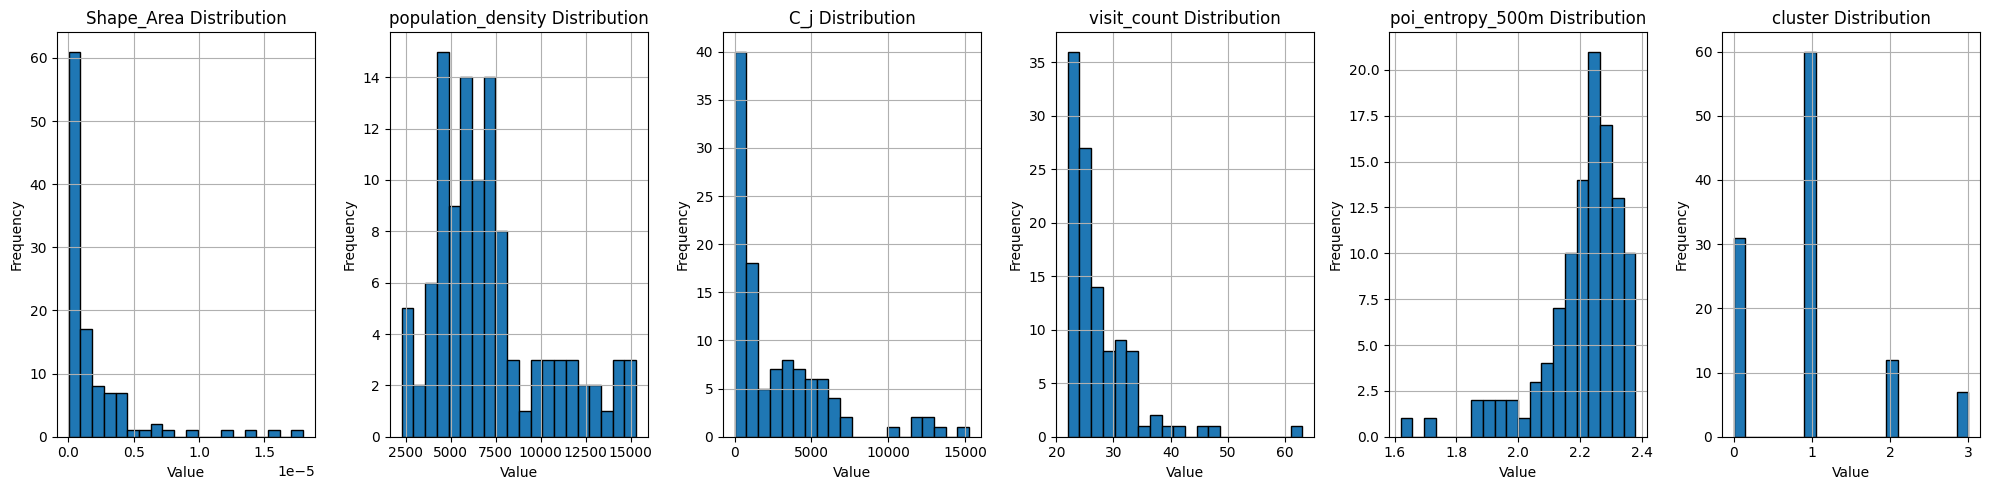

In [54]:
import matplotlib.pyplot as plt

# List of column names
names = ["Shape_Area","population_density", "C_j", "visit_count", "poi_entropy_500m", "cluster"]

# Create a figure and 6 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Iterate through the list of column names and corresponding axes
for i, ax in zip(names, axes):
    # Plot histogram for each column in the gdf
    gdf[i].hist(bins=20, edgecolor='black', ax=ax)
    ax.set_title(f"{i} Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


聚类中心之间的距离矩阵：
 [[0.         1.80088945 2.75830494 3.20896736]
 [1.80088945 0.         2.7013378  3.51280996]
 [2.75830494 2.7013378  0.         3.95302149]
 [3.20896736 3.51280996 3.95302149 0.        ]]


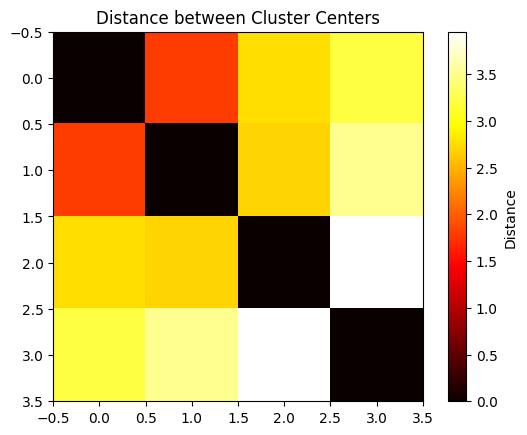

In [55]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# 假设 kmeans 是一个已经训练好的 KMeans 模型
centers = kmeans.cluster_centers_  # 获取聚类中心

# 计算聚类中心之间的欧氏距离
distances = cdist(centers, centers, 'euclidean')  # 计算所有聚类中心之间的距离

# 输出每对聚类中心的距离
print("聚类中心之间的距离矩阵：\n", distances)

# 可视化每对聚类中心之间的距离
plt.imshow(distances, cmap='hot', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('Distance between Cluster Centers')
plt.show()

In [53]:
import geopandas as gpd
# name --> 1 no name --> 0
gdf['has_name'] = gdf['name'].apply(lambda x: 1 if pd.notna(x) and x != '' else 0)
gdf

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry,population_density,R_j,C_j,visit_count,poi_entropy_500m,cluster,has_name
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ...",4323.209232,4.965937e-08,198.444303,38,2.144317,0,1
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ...",6486.324482,1.482014e-07,46.696943,33,2.206376,0,1
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ...",4341.720982,2.005230e-10,4662.802711,26,2.283983,1,1
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ...",7487.630415,8.537400e-11,5287.586959,27,2.254954,1,0
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ...",7184.962137,2.469320e-10,4018.269810,25,2.252107,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,5513,477138725,7202,park,None,0.001543,1.101900e-07,"MULTIPOLYGON (((121.44744 31.21099, 121.44719 ...",3637.379818,3.224450e-10,341.733049,25,2.225537,1,0
106,5514,477138726,7202,park,None,0.001404,1.157900e-07,"MULTIPOLYGON (((121.44357 31.21067, 121.44327 ...",4306.456010,3.964180e-10,292.091011,23,2.192877,1,0
107,6469,571607270,7202,park,None,0.002431,2.940200e-07,"MULTIPOLYGON (((121.44621 31.19872, 121.4466 3...",5528.125035,2.200157e-09,133.635944,23,2.379101,1,0
108,9370,870546902,7202,park,None,0.008064,1.239510e-06,"MULTIPOLYGON (((121.45771 31.17676, 121.45772 ...",10338.352359,7.526439e-09,164.687448,31,2.328584,0,0


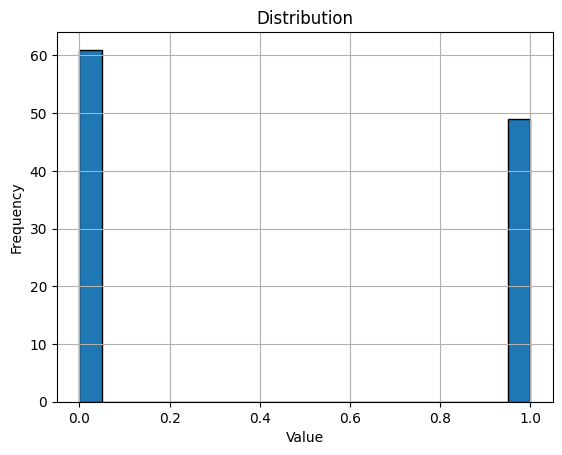

In [ ]:
import matplotlib.pyplot as plt
# 	Shape_Area
gdf["has_name"].hist(bins=20, edgecolor='black')
plt.title("Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

    OBJECTID     osm_id  code fclass   name  Shape_Leng  Shape_Area  \
0         56   39763744  7202   park   人民公园    0.013504    0.000010   
1         57   39961770  7202   park   复兴公园    0.011324    0.000007   
5        249   62072386  7202   park   None    0.006796    0.000001   
14       902  178702679  7202   park   音乐广场    0.008221    0.000004   
19      1373   10369752  7202   park  太平桥公园    0.013804    0.000002   

                                             geometry  population_density  \
0   MULTIPOLYGON (((121.47083 31.23446, 121.47125 ...         4323.209232   
1   MULTIPOLYGON (((121.46457 31.22042, 121.46464 ...         6486.324482   
5   MULTIPOLYGON (((121.48425 31.23046, 121.48308 ...         9994.036632   
14  MULTIPOLYGON (((121.47267 31.22765, 121.4726 3...         6721.907495   
19  MULTIPOLYGON (((121.47544 31.22224, 121.47549 ...        12448.810803   

             R_j          C_j  visit_count  poi_entropy_500m  cluster  \
0   4.965937e-08   198.444303        

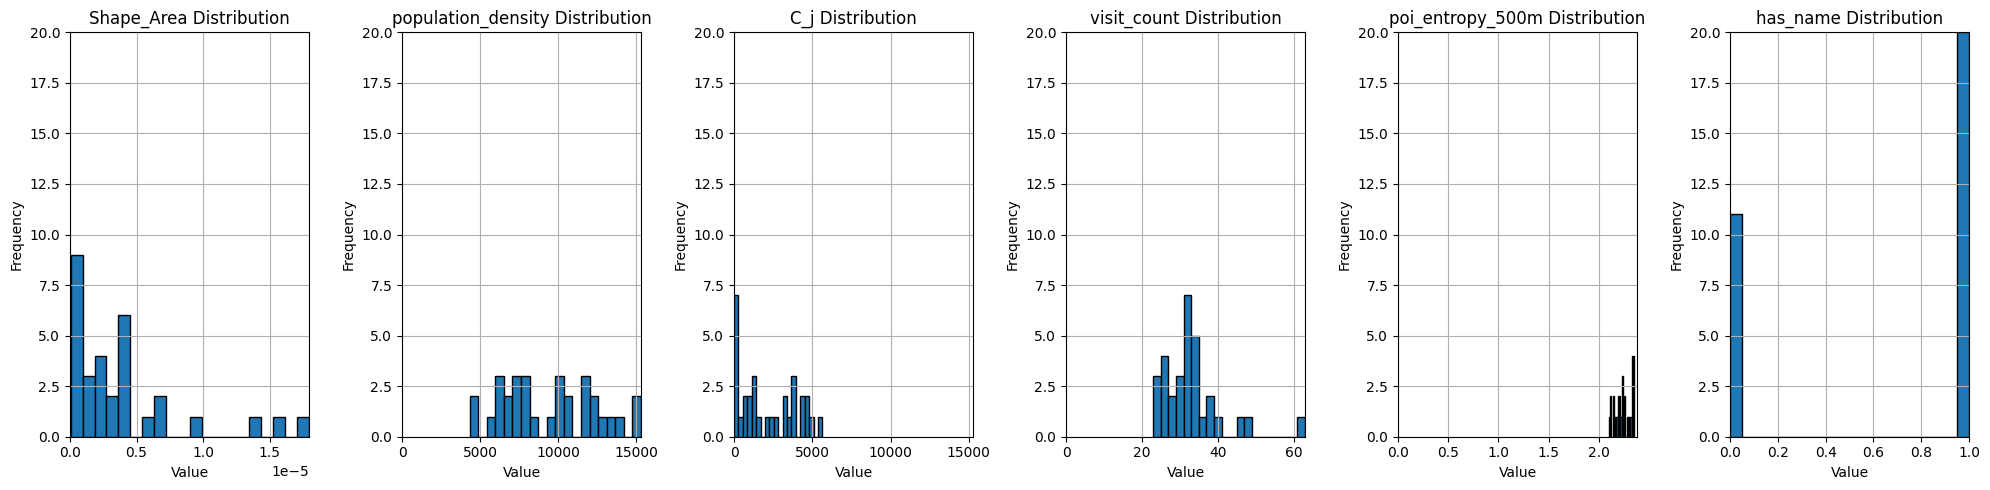

In [91]:
import matplotlib.pyplot as plt
cluster_0_data = gdf[gdf["cluster"] == 0]
print(cluster_0_data.head())
print(len(cluster_0_data))


# List of column names
names = ["Shape_Area","population_density", "C_j", "visit_count", "poi_entropy_500m", "has_name"]

# Create a figure and 6 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Iterate through the list of column names and corresponding axes
for i, ax in zip(names, axes):
    # Plot histogram for each column in the gdf
    cluster_0_data[i].hist(bins=20, edgecolor='black', ax=ax)
    ax.set_xlim(0, max(gdf[i]))  # Set x-axis limit
    ax.set_ylim(0, 20)  # Set y-axis limit
    ax.set_title(f"{i} Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

   OBJECTID    osm_id  code fclass   name  Shape_Leng    Shape_Area  \
2       129  50258395  7202   park  大观园绿地    0.004629  9.350000e-07   
3       246  58413664  7202   park   None    0.004009  4.514200e-07   
4       247  58413720  7202   park   None    0.005192  9.922400e-07   
6       351  72083112  7202   park   丽园公园    0.007023  1.465180e-06   
9       356  72233364  7202   park   襄阳公园    0.005721  1.851830e-06   

                                            geometry  population_density  \
2  MULTIPOLYGON (((121.46866 31.23965, 121.46744 ...         4341.720982   
3  MULTIPOLYGON (((121.47952 31.19812, 121.47822 ...         7487.630415   
4  MULTIPOLYGON (((121.48059 31.19819, 121.48047 ...         7184.962137   
6  MULTIPOLYGON (((121.47565 31.20978, 121.47589 ...         6679.602052   
9  MULTIPOLYGON (((121.45242 31.21962, 121.45291 ...         2887.255218   

            R_j          C_j  visit_count  poi_entropy_500m  cluster  has_name  
2  2.005230e-10  4662.802711       

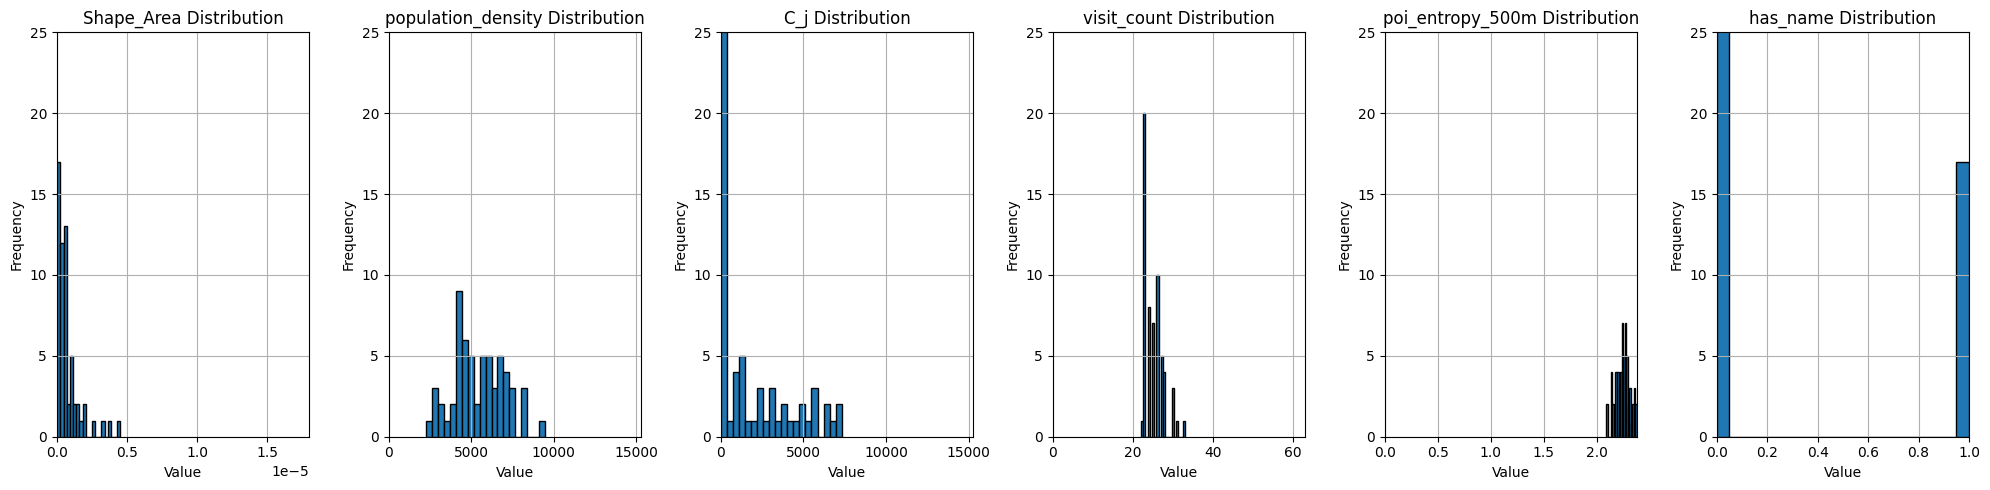

In [96]:
import matplotlib.pyplot as plt
cluster_1_data = gdf[gdf["cluster"] == 1]
print(cluster_1_data.head())
print(len(cluster_1_data))


# List of column names
names = ["Shape_Area","population_density", "C_j", "visit_count", "poi_entropy_500m", "has_name"]

# Create a figure and 6 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Iterate through the list of column names and corresponding axes
for i, ax in zip(names, axes):
    # Plot histogram for each column in the gdf
    cluster_1_data[i].hist(bins=20, edgecolor='black', ax=ax)
    ax.set_xlim(0, max(gdf[i]))  # Set x-axis limit
    ax.set_ylim(0, 25)  # Set y-axis limit
    ax.set_title(f"{i} Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

    OBJECTID      osm_id  code fclass  name  Shape_Leng    Shape_Area  \
12       509   137191767  7202   park  世纪广场    0.004211  8.466800e-07   
13       898   178411796  7202   park  黄浦公园    0.007134  1.859010e-06   
15      1052   228110461  7202   park  古城公园    0.007858  3.436350e-06   
18      1372   292718782  7202   park  延福绿地    0.005131  1.594870e-06   
49     13608  1056770823  7202   park  东门广场    0.002030  6.686000e-08   

                                             geometry  population_density  \
12  MULTIPOLYGON (((121.47516 31.23687, 121.47511 ...         7588.640274   
13  MULTIPOLYGON (((121.48566 31.24484, 121.48585 ...        11023.429326   
15  MULTIPOLYGON (((121.48968 31.231, 121.48983 31...        14211.749602   
18  MULTIPOLYGON (((121.4792 31.23184, 121.47786 3...         5686.047529   
49  MULTIPOLYGON (((121.4939 31.22098, 121.4939 31...        10150.465217   

             R_j          C_j  visit_count  poi_entropy_500m  cluster  \
12  7.913527e-09   106.99

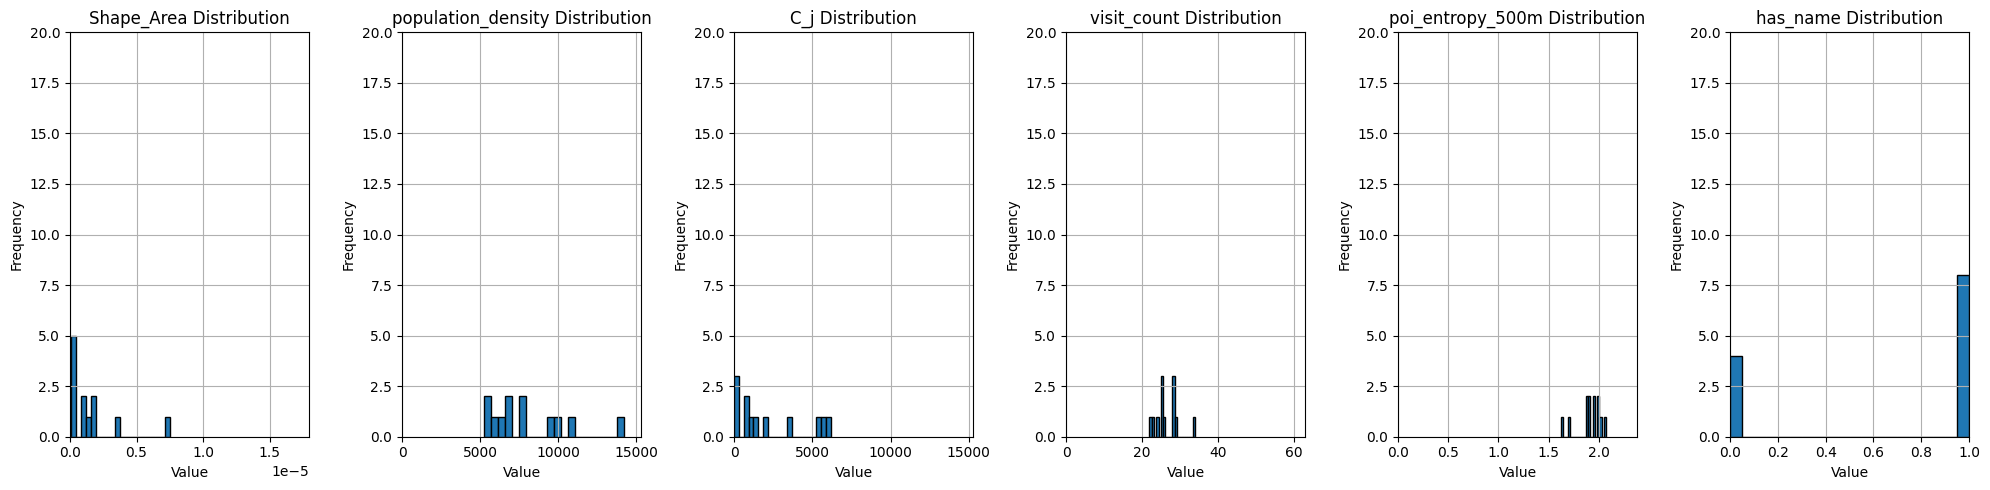

In [93]:
import matplotlib.pyplot as plt
cluster_2_data = gdf[gdf["cluster"] == 2]
print(cluster_2_data.head())
print(len(cluster_2_data))


# List of column names
names = ["Shape_Area","population_density", "C_j", "visit_count", "poi_entropy_500m", "has_name"]

# Create a figure and 6 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Iterate through the list of column names and corresponding axes
for i, ax in zip(names, axes):
    # Plot histogram for each column in the gdf
    cluster_2_data[i].hist(bins=20, edgecolor='black', ax=ax)
    ax.set_xlim(0, max(gdf[i]))  # Set x-axis limit
    ax.set_ylim(0, 20)  # Set y-axis limit
    ax.set_title(f"{i} Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

    OBJECTID     osm_id  code fclass  name  Shape_Leng    Shape_Area  \
7        352   72083159  7202   park  蓬莱公园    0.010484  3.237890e-06   
8        355   72233363  7202   park  淮茂绿地    0.005387  1.803500e-06   
36      3358  404709025  7202   park  人民广场    0.015134  1.203666e-05   
79      3162  398934699  7202   park  None    0.002428  2.770400e-07   
81      3177  399435158  7202   park  None    0.004765  3.974400e-07   

                                             geometry  population_density  \
7   MULTIPOLYGON (((121.48659 31.2097, 121.48669 3...         4660.837101   
8   MULTIPOLYGON (((121.45647 31.21991, 121.45543 ...         2877.484418   
36  MULTIPOLYGON (((121.47258 31.23022, 121.47105 ...         5696.970367   
79  MULTIPOLYGON (((121.40708 31.21977, 121.40709 ...        15068.630775   
81  MULTIPOLYGON (((121.40782 31.22213, 121.40775 ...        13238.784526   

             R_j           C_j  visit_count  poi_entropy_500m  cluster  \
7   2.408160e-10  13445.498630

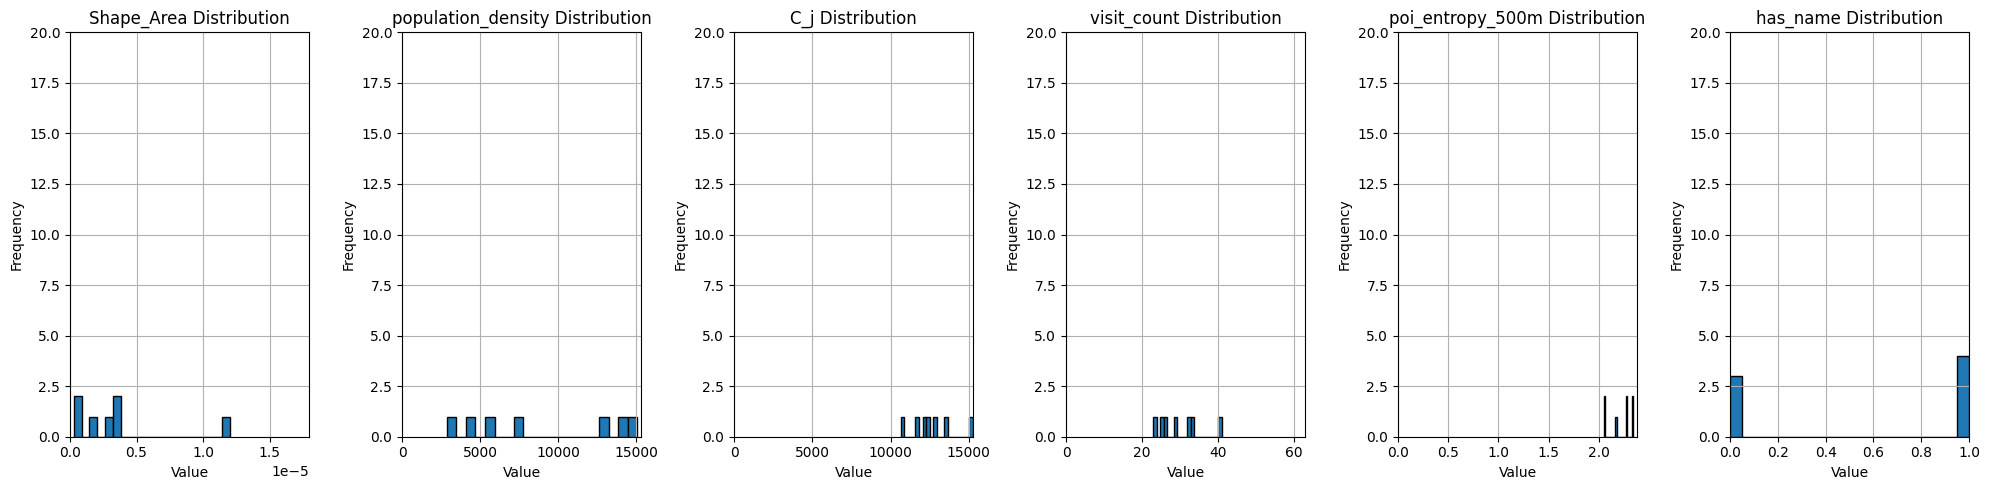

In [97]:
import matplotlib.pyplot as plt
cluster_3_data = gdf[gdf["cluster"] == 3]
print(cluster_3_data.head())
print(len(cluster_3_data))


# List of column names
names = ["Shape_Area","population_density", "C_j", "visit_count", "poi_entropy_500m", "has_name"]

# Create a figure and 6 subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 6, figsize=(20, 5))

# Iterate through the list of column names and corresponding axes
for i, ax in zip(names, axes):
    # Plot histogram for each column in the gdf
    cluster_3_data[i].hist(bins=20, edgecolor='black', ax=ax)
    ax.set_xlim(0, max(gdf[i]))  # Set x-axis limit
    ax.set_ylim(0, 20)  # Set y-axis limit
    ax.set_title(f"{i} Distribution")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plo

In [ ]:
# 保存结果为 GeoJSON
output_geojson = '/content/drive/MyDrive/clustering2_results.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')

# 保存结果为 CSV
#output_csv = '/content/drive/MyDrive/clustering_results.csv'
#gdf[['population_density', 'visit_count', 'poi_entropy_500m', 'cluster']].to_csv(output_csv, index=False)

print("聚类结果已保存。")


聚类结果已保存。


# 多项式核计算

In [ ]:
from sklearn.preprocessing import StandardScaler
# 加载数据
data_path = '/content/drive/MyDrive/Capstone/IMPORTANT_DATA/filtered_park_df.geojson'

gdf = gpd.read_file(data_path)
#print(gdf)
gdf = gdf.merge(merged_df[['OBJECTID', 'population_density', 'R_j','C_j','visit_count', 'poi_entropy_500m']], on='OBJECTID', how='left')

features=gdf[['population_density','C_j','visit_count', 'poi_entropy_500m']]

# 标准化处理
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 转换为 DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=['population_density','C_j','visit_count', 'poi_entropy_500m'])


# 检查标准化结果
print(scaled_features_df.head())


   population_density       C_j  visit_count  poi_entropy_500m
0           -0.875114 -0.776931     1.763388         -0.460216
1           -0.477910 -0.822720     0.912631          0.005701
2           -0.811992  0.570187    -0.278430          0.588354
3           -0.196051  0.758715    -0.108278          0.370416
4           -0.280027  0.375699    -0.448581          0.349038


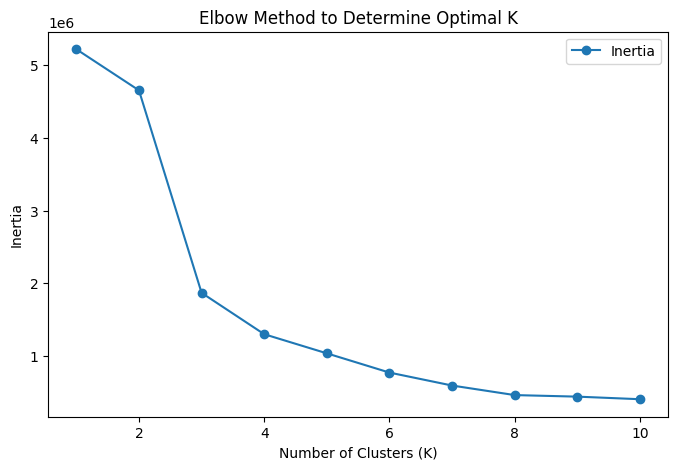

In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.cluster import KMeans
# 使用肘部法评估最佳 K 值
inertia = []
K_range = range(1, 11)

# 计算核矩阵
degree = 2  # 多项式次数
coef0 = 1   # 核函数常数
gamma = 1   # 缩放系数

K = polynomial_kernel(scaled_features, degree=degree, coef0=coef0, gamma=gamma)

# Step 2: Elbow 方法选择最优簇数

k_values = range(1, 11)  # 尝试 1 到 10 个簇
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(K)  # 在核矩阵上进行聚类
    inertia.append(kmeans.inertia_)

# 绘制肘部法图
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'o-', label='Inertia')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.cluster import KMeans

# 定义多项式核参数
degree = 2  # 多项式次数
coef0 = 1   # 核函数常数
gamma = 1   # 缩放系数

# Step 1: 计算多项式核矩阵
kernel_matrix = polynomial_kernel(scaled_features_filled, degree=degree, coef0=coef0, gamma=gamma)

# Step 2: 执行 Kernel K-Means 聚类
k = 4  # 根据肘部法结果选择 K 值
kmeans = KMeans(n_clusters=k, random_state=42)
gdf['cluster'] = kmeans.fit_predict(kernel_matrix)  # 在核矩阵上进行聚类

# Step 3: 查看聚类结果
print(gdf[['population_density', 'C_j', 'visit_count', 'poi_entropy_500m', 'cluster']].head())


   population_density          C_j  visit_count  poi_entropy_500m  cluster
0        50637.375485   198.444303           38          2.144317        0
1        65020.561375    46.696943           33          2.206376        0
2        52923.077975  4662.802711           26          2.283983        0
3        75226.966656  5287.586959           27          2.254954        0
4        72186.109292  4018.269810           25          2.252107        0


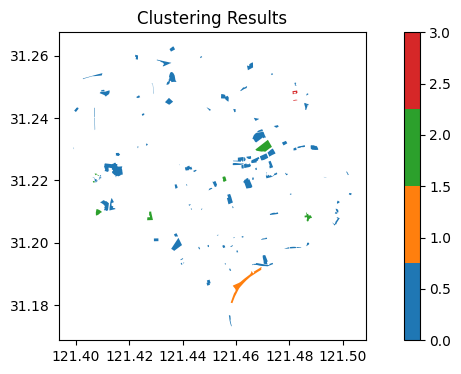

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cmap = ListedColormap(colors)

gdf.plot(column='cluster', cmap=cmap, legend=True, figsize=(10, 4))
# 绘制聚类结果的地图
plt.title('Clustering Results')
plt.show()

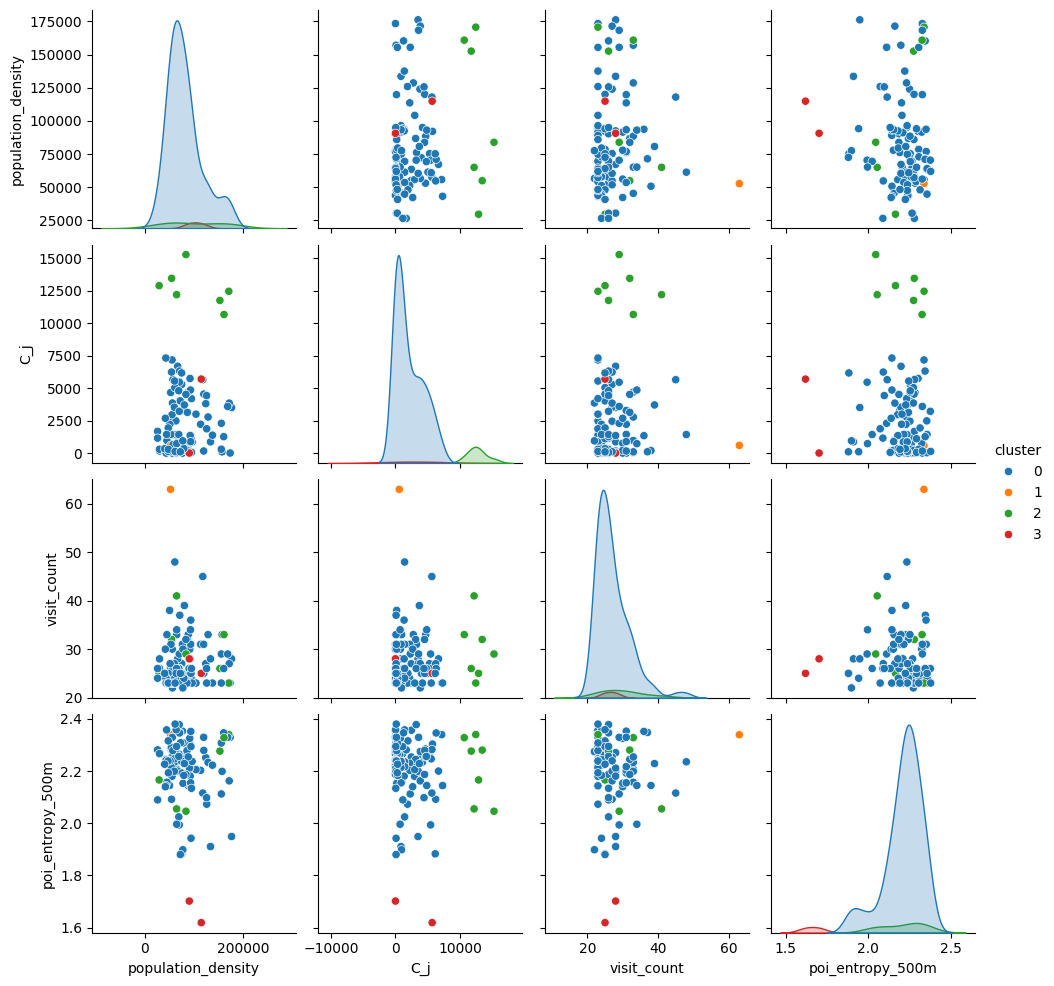

In [ ]:
# 绘制每个聚类类别的特征分布
color_list = cmap.colors
sns.pairplot(data=gdf, vars=['population_density',"C_j", 'visit_count', 'poi_entropy_500m'], hue='cluster', palette=color_list)
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np
labels_m = np.array(gdf['cluster'])
print("gdf_X shape:", len(scaled_features_filled))
print("labels shape:", len(labels_m ))
# 计算Calinski-Harabasz指数
ch_score = calinski_harabasz_score(scaled_features_filled, labels_m )
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

gdf_X shape: 110
labels shape: 110
Calinski-Harabasz Score: 17.09


# 多项式kernel

In [ ]:
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

# 定义多项式核参数
degree = 3  # 多项式次数
#coef0 = 1   # 核函数常数
gamma = 0.1   # 缩放系数

# Step 1: 计算多项式核矩阵
kernel_matrix = rbf_kernel(scaled_features, gamma=gamma)

# Step 2: 执行 Kernel K-Means 聚类
k = 5  # 根据肘部法结果选择 K 值
kmeans = KMeans(n_clusters=k, random_state=42)
gdf['cluster'] = kmeans.fit_predict(kernel_matrix)  # 在核矩阵上进行聚类

# Step 3: 查看聚类结果
print(gdf[['population_density', 'C_j', 'visit_count', 'poi_entropy_500m', 'cluster']].head())

   population_density          C_j  visit_count  poi_entropy_500m  cluster
0        50637.375485   198.444303           38          2.144317        0
1        65020.561375    46.696943           33          2.206376        0
2        52923.077975  4662.802711           26          2.283983        4
3        75226.966656  5287.586959           27          2.254954        4
4        72186.109292  4018.269810           25          2.252107        4


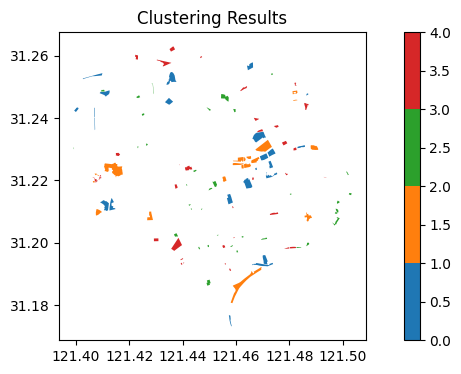

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cmap = ListedColormap(colors)

gdf.plot(column='cluster', cmap=cmap, legend=True, figsize=(10, 4))
# 绘制聚类结果的地图
plt.title('Clustering Results')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The palette list has

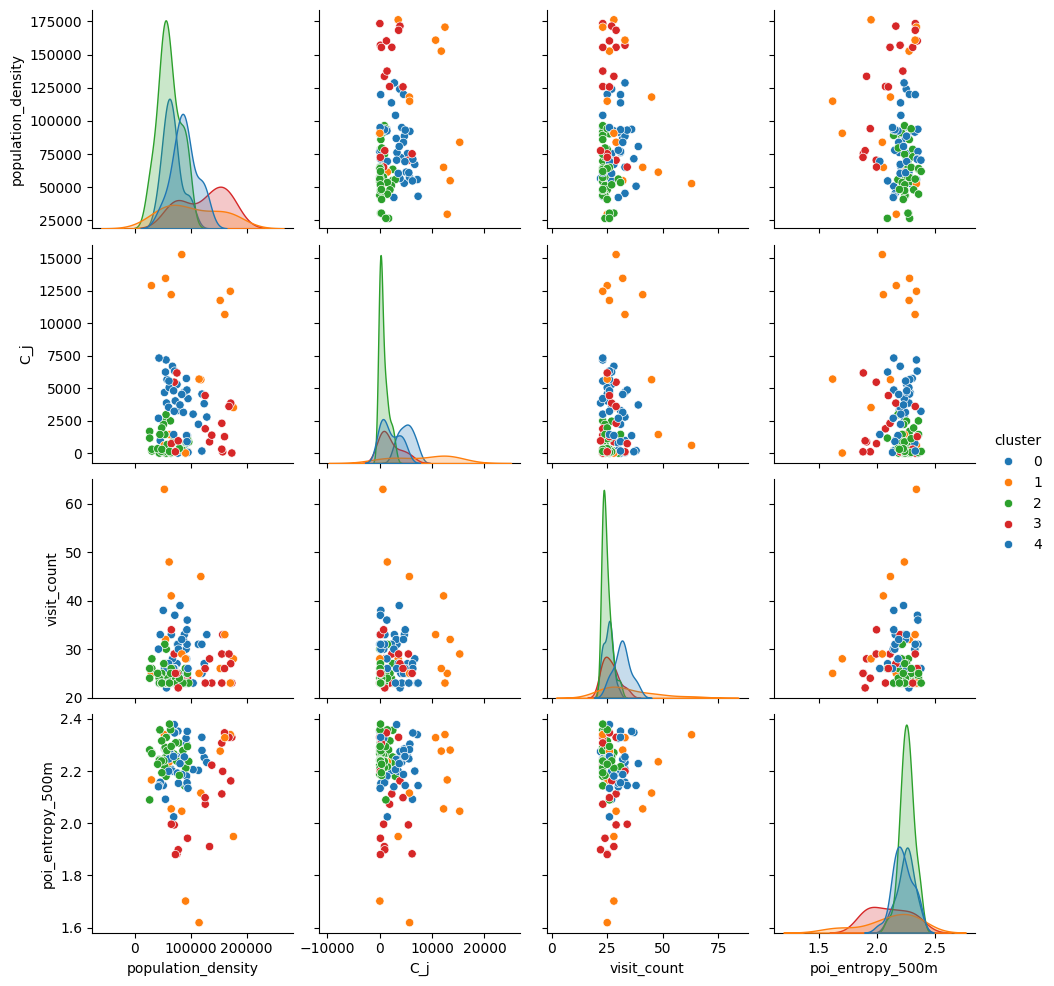

In [ ]:
# 绘制每个聚类类别的特征分布
color_list = cmap.colors
sns.pairplot(data=gdf, vars=['population_density',"C_j", 'visit_count', 'poi_entropy_500m'], hue='cluster', palette=color_list)
plt.show()

In [ ]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np
labels_m = np.array(gdf['cluster'])
print("gdf_X shape:", len(scaled_features_filled))
print("labels shape:", len(labels_m ))
# 计算Calinski-Harabasz指数
ch_score = calinski_harabasz_score(scaled_features_filled, labels_m )
print(f"Calinski-Harabasz Score: {ch_score:.2f}")

gdf_X shape: 110
labels shape: 110
Calinski-Harabasz Score: 16.61


In [ ]:
!pip install minisom


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8f75413495ee96aea295117f43d67587825ba0896d660bfcbe006b8eefa277fe
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [ ]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# 加载数据
#data_path = '/content/drive/MyDrive/Shanghai_CITY_PARK.geojson'  # 替换为实际路径
#gdf = gpd.read_file(data_path)

# 提取需要用于聚类的列
#features = gdf[['population_density', 'visit_count', 'poi_entropy_500m']]

# 检查数据
#print(features.head())


In [ ]:
scaled_features

array([[-8.75113954e-01, -7.76930793e-01,  1.76338800e+00,
        -4.60215926e-01],
       [-4.77909917e-01, -8.22720469e-01,  9.12630634e-01,
         5.70136567e-03],
       [-8.11992316e-01,  5.70186727e-01, -2.78429685e-01,
         5.88353674e-01],
       [-1.96051265e-01,  7.58715006e-01, -1.08278211e-01,
         3.70415641e-01],
       [-2.80027154e-01,  3.75699304e-01, -4.48581159e-01,
         3.49038259e-01],
       [ 1.14788546e+00,  3.11258464e-01, -1.08278211e-01,
         3.40648719e-01],
       [-4.20240276e-01,  1.17942808e+00,  6.18732633e-02,
        -4.69506902e-02],
       [-7.60049293e-01,  3.22036005e+00,  7.42479160e-01,
         5.55938381e-01],
       [-1.45877322e+00,  3.05109285e+00, -4.48581159e-01,
        -3.00919824e-01],
       [-1.43591187e+00, -7.86686083e-01,  6.18732633e-02,
         4.81423846e-01],
       [-3.53371678e-01, -5.03525735e-01, -7.88884107e-01,
         4.45349211e-01],
       [-4.93539218e-01, -8.35081288e-01, -7.88884107e-01,
      

In [ ]:
# SOM 网格大小
x = 12
y = 8
input_len = scaled_features_filled.shape[1]  # 输入数据的维度

# 初始化 SOM
som = MiniSom(x, y, input_len, sigma=1.0, learning_rate=0.5, random_seed=42)

# 初始化权重
som.random_weights_init(scaled_features_filled)

# 训练 SOM
som.train_random(scaled_features_filled, 100)  # 训练 100 次迭代


In [ ]:
# 为每个数据点找到其 BMU
win_map = som.win_map(scaled_features_filled)

# 将数据分配到网格单元
gdf['som_cluster'] = [som.winner(x) for x in scaled_features_filled]

# 将 BMU 转换为聚类标签
clusters = {bmu: idx for idx, bmu in enumerate(win_map.keys())}
gdf['som_cluster_label'] = gdf['som_cluster'].map(clusters)

# 查看聚类结果
#print(gdf[['population_density', 'visit_count', 'poi_entropy_500m', 'som_cluster_label']].head())


In [ ]:
gdf

,OBJECTID,osm_id,code,fclass,name,Shape_Leng,Shape_Area,geometry,population_density,R_j,C_j,visit_count,poi_entropy_500m,cluster,som_cluster,som_cluster_label
0,56,39763744,7202,park,人民公园,0.013504,9.854620e-06,"MULTIPOLYGON (((121.47083 31.23446, 121.47125 ...",50637.375485,4.965937e-08,198.444303,38.0,2.144317,0,"(0, 0)",0
1,57,39961770,7202,park,复兴公园,0.011324,6.920550e-06,"MULTIPOLYGON (((121.46457 31.22042, 121.46464 ...",65020.561375,1.482014e-07,46.696943,33.0,2.206376,0,"(0, 0)",0
2,129,50258395,7202,park,大观园绿地,0.004629,9.350000e-07,"MULTIPOLYGON (((121.46866 31.23965, 121.46744 ...",52923.077975,2.005230e-10,4662.802711,26.0,2.283983,0,"(0, 0)",0
3,246,58413664,7202,park,None,0.004009,4.514200e-07,"MULTIPOLYGON (((121.47952 31.19812, 121.47822 ...",75226.966656,8.537400e-11,5287.586959,27.0,2.254954,0,"(0, 0)",0
4,247,58413720,7202,park,None,0.005192,9.922400e-07,"MULTIPOLYGON (((121.48059 31.19819, 121.48047 ...",72186.109292,2.469320e-10,4018.269810,25.0,2.252107,0,"(0, 0)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,9374,870546906,7202,park,None,0.003493,5.378900e-07,"MULTIPOLYGON (((121.45515 31.1332, 121.45508 3...",NaN,NaN,NaN,NaN,NaN,0,"(0, 0)",0
443,9378,870546911,7202,park,None,0.009129,3.280150e-06,"MULTIPOLYGON (((121.45529 31.11205, 121.4553 3...",NaN,NaN,NaN,NaN,NaN,0,"(0, 0)",0
444,9886,886526878,7202,park,None,0.011583,1.330440e-06,"MULTIPOLYGON (((121.43203 31.13155, 121.43337 ...",NaN,NaN,NaN,NaN,NaN,0,"(0, 0)",0
445,9887,886526879,7202,park,None,0.022343,5.065840e-06,"MULTIPOLYGON (((121.44593 31.13113, 121.43989 ...",NaN,NaN,NaN,NaN,NaN,0,"(0, 0)",0


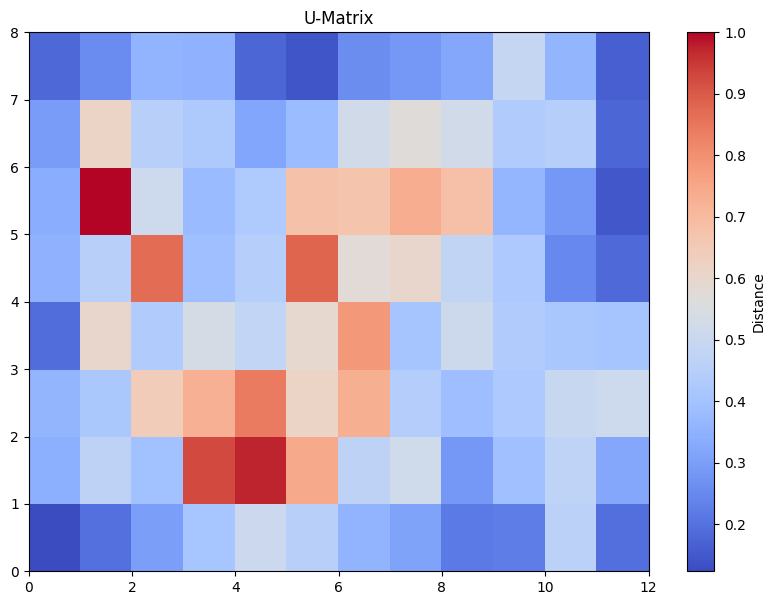

In [ ]:
# 可视化 U-Matrix
plt.figure(figsize=(10, 7))
plt.pcolor(som.distance_map().T, cmap='coolwarm')  # 距离图（U-Matrix）
plt.colorbar(label='Distance')
plt.title('U-Matrix')
plt.show()


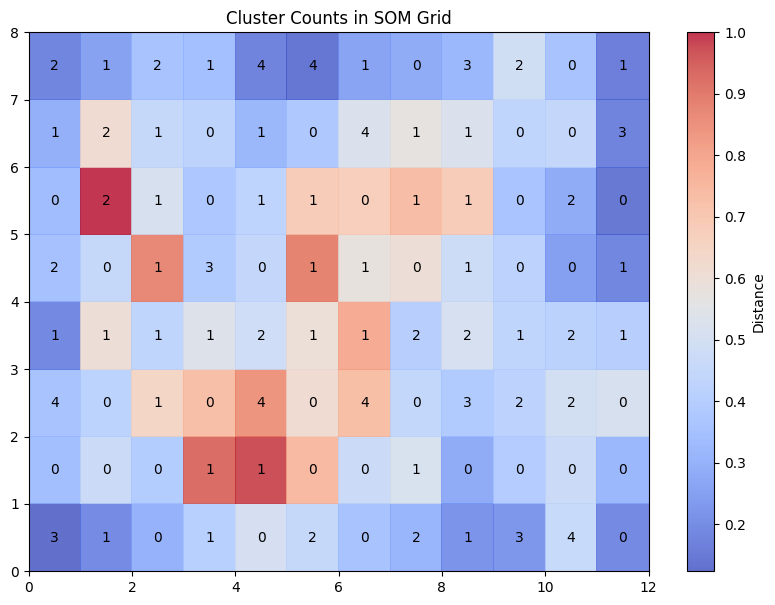

In [ ]:
# 显示每个网格单元的 BMU 数量
plt.figure(figsize=(10, 7))
for i in range(x):
    for j in range(y):
        plt.text(i + 0.5, j + 0.5, str(len(win_map.get((i, j), []))), color='black', ha='center', va='center')

plt.pcolor(som.distance_map().T, cmap='coolwarm', alpha=0.8)  # 距离图（U-Matrix）
plt.colorbar(label='Distance')
plt.title('Cluster Counts in SOM Grid')
plt.show()


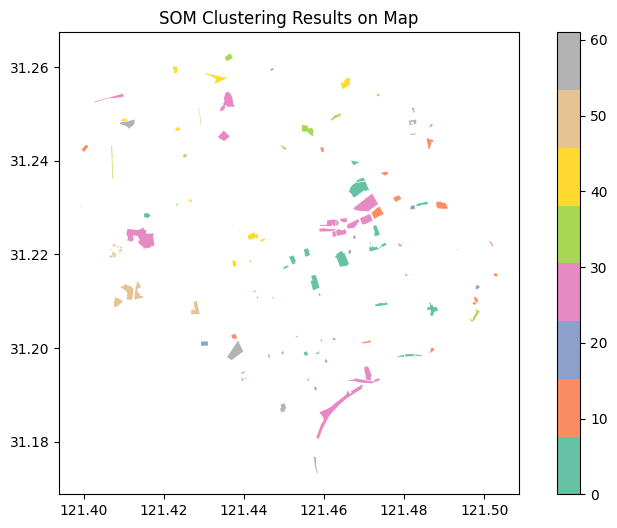

In [ ]:
# 绘制 SOM 聚类结果的地图
gdf.plot(column='som_cluster_label', cmap='Set2', legend=True, figsize=(10, 6))
plt.title('SOM Clustering Results on Map')
plt.show()


In [ ]:
# 保存为 GeoJSON
output_geojson = '/content/drive/MyDrive/som_clustering_results2.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')

# 保存为 CSV
output_csv = '/content/drive/MyDrive/som_clustering_results.csv'
#gdf[['population_density', 'visit_count', 'poi_entropy_500m', 'som_cluster_label']].to_csv(output_csv, index=False)

print("SOM 聚类结果已保存。")


SOM 聚类结果已保存。
